In [197]:
import geopandas as geop
import pandas as pd
import numpy as np
import warnings

In [198]:
# Reading crime csv file

crime_hist = pd.read_csv('MPS LSOA Level Crime (Historical).csv')

In [199]:
# New data set with 2011 colums and new variable with sum calculation by row. 

crime_2011 = crime_hist[crime_hist.columns[crime_hist.columns.str.startswith(('2011'))]]
crime_2011_totals = crime_2011.sum(axis=1)

In [200]:
# New data set with 2021 colums and new variable with sum calculation by LSOA (row). 

crime_2021 = crime_hist[crime_hist.columns[crime_hist.columns.str.startswith(('2021'))]]
crime_2021_totals = crime_2021.sum(axis=1)

In [201]:
# Copy of crime data and merging of 2011 and 2021 totals by row

crime_cases = crime_hist
crime_cases ['2011 Crime Cases'] = crime_2011_totals
crime_cases ['2021 Crime Cases'] = crime_2021_totals

In [202]:
# Selection of columns

crime_cases = crime_cases[['LSOA Code', 'LSOA Name', '2011 Crime Cases', '2021 Crime Cases']]

In [203]:
# Group by and summary of the dataset, grouping by LSOA Code and Name and them summary of totals by LSOA for 2011 and 2021

crime = crime_cases.groupby(['LSOA Code','LSOA Name']).agg(
    LSOA_Crime2011 =('2011 Crime Cases', 'sum'),
    LSOA_Crime2021 =('2021 Crime Cases', 'sum')
)

crime.head(5)

,,LSOA_Crime2011,LSOA_Crime2021
LSOA Code,LSOA Name,,
E01000006,Barking and Dagenham 016A,98,94
E01000007,Barking and Dagenham 015A,355,507
E01000008,Barking and Dagenham 015B,161,224
E01000009,Barking and Dagenham 016B,308,298
E01000011,Barking and Dagenham 016C,107,111


In [185]:
# Read in population by place of birth data 2011 and selection of relevant columns

POB_2011 = pd.read_excel('Country of birth.xlsx', sheet_name= '2011')
POB_2011 = POB_2011 [['LSOA code', 'All Usual residents','United Kingdom']]
POB_2011['Non UK Percentage']= 1-(POB_2011['United Kingdom']/POB_2011['All Usual residents'])

POB_2011.drop(columns='United Kingdom', inplace=True)
#POB_2011 = POB_2011 [['LSOA code', 'All Usual residents', 'Non UK Percentage']]
POB_2011 = POB_2011.rename(columns={'LSOA code': 'LSOA Code'})
POB_2011.head(5)

,LSOA Code,All Usual residents,Non UK Percentage
0,E01000001,1465,0.326962
1,E01000002,1436,0.270195
2,E01000003,1346,0.324666
3,E01000005,985,0.392893
4,E01032739,1044,0.501916


In [186]:
# Read in population by place of birth data 2021 and selection of relevant columns

POB_2021 = pd.read_excel('Country of birth.xlsx', sheet_name= '2021')
POB_2021 = POB_2021 [['LSOA code', 'All Usual residents','United Kingdom']]
POB_2021['Non UK Percentage']= 1-(POB_2021['United Kingdom']/POB_2021['All Usual residents'])
POB_2021.drop(columns='United Kingdom' ,inplace=True)

POB_2021 = POB_2021.rename(columns={'LSOA code': 'LSOA Code'})
POB_2021.head(5)

,LSOA Code,All Usual residents,Non UK Percentage
0,E01000001,1478,0.408660
1,E01000002,1382,0.450796
2,E01000003,1613,0.429014
3,E01000005,1098,0.485428
4,E01032739,1621,0.570019


Find number of null values in POB 2011 and 2022 datasets

Find mean, count and number of null values for each dataset

To fix: printing out the fivenum values(i.e. min, 2nd, 3rd, 4th quartile and max)


In [189]:
yearnum = int()

for n in [POB_2011, POB_2021]:
    data_name = [name for name, obj in locals().items() if obj is n][0]
    n['Non UK Percentage'] = pd.Series(n['Non UK Percentage'])
    #Get summary statistics
    #%8.2f
    fivenum_summary = np.percentile(n['Non UK Percentage'].astype(float).dropna(), [0, 25, 50, 75, 100])
    print("{} statistics:".format(data_name) + " Min:{}".format(round(fivenum_summary[0],3)) + ", Q1:{} ".format(round(fivenum_summary[1],3)) + ", Median:{}".format(round(fivenum_summary[2],3))  + ", Q3:{}".format(round(fivenum_summary[3],3)) + ", Max:{}".format(round(fivenum_summary[4],3)))
    
    print("Mean Non UK population percentage for {} ".format(data_name) + " is "+  str(n['Non UK Percentage'].mean()))
    print("Number of null population percentage values for {} ".format(data_name) + " is "+  str(n['Non UK Percentage'].isnull().sum()))
    print("Count of LSOAs with population percentage values  for {} ".format(data_name) + " is "+  str(n['Non UK Percentage'].count()))


POB_2011 statistics: Min:0.036, Q1:0.258 , Median:0.373, Q3:0.468, Max:0.823
Mean Non UK population percentage for POB_2011  is 0.3629362549727461
Number of null population percentage values for POB_2011  is 37
Count of LSOAs with population percentage values  for POB_2011  is 4957
POB_2021 statistics: Min:0.045, Q1:0.309 , Median:0.408, Q3:0.495, Max:0.816
Mean Non UK population percentage for POB_2021  is 0.40152347080770884
Number of null population percentage values for POB_2021  is 0
Count of LSOAs with population percentage values  for POB_2021  is 4994


In [204]:
# Outer join with 2011 population

crime = crime.merge(POB_2011, on='LSOA Code', how='outer')

In [205]:
# Change of column name

crime = crime.rename(columns={'All Usual residents': '2011 Population'})

In [206]:
# Outer join with 2021 population

crime = crime.merge(POB_2021, on='LSOA Code', how='outer')

In [210]:
# Change of column name

crime = crime.rename(columns={'All Usual residents': '2021 Population'})
crime=crime.rename(columns={'Non UK Percentage_x': '2011 Non UK Percentage'})
crime=crime.rename(columns={'Non UK Percentage_y': '2021 Non UK Percentage'})

In [211]:
crime.head(5)

,LSOA Code,LSOA_Crime2011,LSOA_Crime2021,2011 Population,2011 Non UK Percentage,2021 Population,2021 Non UK Percentage
0,E01000006,98.0,94.0,1703,0.513212,1842,0.517915
1,E01000007,355.0,507.0,1391,0.545651,2907,0.579635
2,E01000008,161.0,224.0,1544,0.522021,1795,0.486908
3,E01000009,308.0,298.0,1773,0.586012,1806,0.601883
4,E01000011,107.0,111.0,1634,0.569767,1698,0.608952


In [212]:
# Checking if there are any missing values. There are 6 rows missing crime data. 

crime.isnull().sum()

LSOA Code                  0
LSOA_Crime2011             6
LSOA_Crime2021             6
2011 Population            0
2011 Non UK Percentage    37
2021 Population            0
2021 Non UK Percentage     0
dtype: int64

In [213]:
# Crime copy for final dataset
crime_final = crime.copy()

In [214]:
# Calculation of 2011 crime rate by 1000 people

crime_final ['2011 Crime/1000 people'] = crime_final ['LSOA_Crime2011']/ (crime_final['2011 Population']/1000)

In [215]:
# Calculation of 2021 crime rate by 1000 people

crime_final ['2021 Crime/1000 people'] = crime_final ['LSOA_Crime2021']/ (crime_final['2021 Population']/1000)



In [216]:
# Final crime data

crime_final.head(5)

,LSOA Code,LSOA_Crime2011,LSOA_Crime2021,2011 Population,2011 Non UK Percentage,2021 Population,2021 Non UK Percentage,2011 Crime/1000 people,2021 Crime/1000 people
0,E01000006,98.0,94.0,1703,0.513212,1842,0.517915,57.545508,51.031488
1,E01000007,355.0,507.0,1391,0.545651,2907,0.579635,255.212078,174.406605
2,E01000008,161.0,224.0,1544,0.522021,1795,0.486908,104.274611,124.791086
3,E01000009,308.0,298.0,1773,0.586012,1806,0.601883,173.716864,165.005537
4,E01000011,107.0,111.0,1634,0.569767,1698,0.608952,65.483476,65.371025


In [217]:
#List of missing values

crime_final[crime_final.isnull().any(axis=1)]


,LSOA Code,LSOA_Crime2011,LSOA_Crime2021,2011 Population,2011 Non UK Percentage,2021 Population,2021 Non UK Percentage,2011 Crime/1000 people,2021 Crime/1000 people
4666,E01033866,154.0,176.0,0,NaN,1118,0.650268,inf,157.423971
4674,E01033874,513.0,199.0,0,NaN,1153,0.573287,inf,172.593235
4690,E01033915,2.0,95.0,0,NaN,1487,0.516476,inf,63.887021
4696,E01033921,5.0,80.0,0,NaN,1657,0.595051,inf,48.280024
4715,E01033940,150.0,277.0,0,NaN,2352,0.560374,inf,117.772109
4717,E01033942,286.0,415.0,0,NaN,1603,0.585777,inf,258.889582
4727,E01034031,37.0,50.0,0,NaN,1309,0.751719,inf,38.197097
4751,E01034147,5.0,9.0,0,NaN,1120,0.646429,inf,8.035714
4752,E01034148,268.0,469.0,0,NaN,1626,0.576876,inf,288.437884
4765,E01034177,18.0,67.0,0,NaN,1603,0.452901,inf,41.796631


In [218]:
# read 2011 geojson file

lsoa_2011 = geop.read_file('LSOA_Boundaries_2011.geojson')


In [219]:
# Change of column name

lsoa_2011 = lsoa_2011.rename(columns={'LSOA11CD':'LSOA Code'})


In [145]:
# #create stripped down version of lsoa_2011.GeoJSON to save on memory as original file took 3m 22.8 seconds to open
# # issue creating the geometry column on a list so might have to park this idea
# lsoa_2011_geogson = lsoa_2011[['LSOA Code','LSOA11NM','geometry']]
# #print(lsoa_2011_geogson.head(5))
# #print(lsoa_2011_geogson.shape)  #34753, 3 . Looks like all of England and Wales
# #scoping to the list of boroughs
# london_boroughs=['City of London','Barking and Dagenham','Barnet','Bexley','Brent','Bromley','Camden','Croydon','Ealing','Enfield','Greenwich','Hackney',
#                  'Hammersmith and Fulham','Haringey','Harrow','Havering','Hillingdon','Hounslow','Islington','Kensington and Chelsea','Kingston upon Thames',
#                  'Lambeth','Lewisham','Merton','Newham','Redbridge','Richmond upon Thames','Southwark','Sutton','Tower Hamlets','Waltham Forest','Wandsworth',
#                  'Westminster']

# lsoa_2011_geogson_london = lsoa_2011_geogson['LSOA11NM'].isin(london_boroughs)
# #print(lsoa_2011_geogson_london.shape)
# #print(type(lsoa_2011_geogson_london))
# #lsoa_2011_geogson_london.head()
# #lsoa_2011_geogson_london.set_geometry('geometry')

# lsoa_2011_geogson_london_gdf=geop.GeoDataFrame(lsoa_2011_geogson_london)

# column_names = lsoa_2011_geogson_london_gdf.columns

# print("Column names:", column_names)

# lsoa_2011_geogson_gdf=geop.GeoDataFrame(lsoa_2011_geogson)
# lsoa_2011_geogson_gdf.set_geometry('geometry')
# lsoa_2011_geogson_london2 = lsoa_2011_geogson_gdf[['LSOA11NM'].isin(london_boroughs),'geometry']

# lsoa_2011_geogson_london2_gdf=geop.GeoDataFrame(lsoa_2011_geogson_london2)
# print(lsoa_2011_geogson_london2_gdf.shape)
# print(type(lsoa_2011_geogson_london2_gdf))


# # column_names_lsoa_2011_geogson = lsoa_2011_geogson_gdf.columns

# # print("Column names:", column_names)

# print("Column names lsoa_2011_geogson_london2: ", lsoa_2011_geogson_london2_gdf.columns)

# #lsoa_2011_geogson_london_gdf=lsoa_2011_geogson_london_gdf.set_geometry('geometry')
# #lsoa_2011_geogson_london_gdf.to_file('LondonShapes_LSOA2011.geojson')


In [146]:

#might scrap this dataset. Advantage of it was it is much quicker to load
#lsoa_2011_14Mar = geop.read_file('LondonShapes_LSOA2011_old.geojson')
#lsoa_2011 = lsoa_2011.rename(columns={'LSOA11CD':'LSOA Code'})
#print(lsoa_2011_14Mar.head(5))
#print(lsoa_2011_14Mar.shape)  # 4835,3 (Scoped to London)

    LSOA11CD                   LSOA11NM  \
0  E01000001        City of London 001A   
1  E01000002        City of London 001B   
2  E01000003        City of London 001C   
3  E01000005        City of London 001E   
4  E01000006  Barking and Dagenham 016A   

                                            geometry  
0  MULTIPOLYGON (((532105.09200 182011.23000, 532...  
1  MULTIPOLYGON (((532746.81300 181786.89100, 532...  
2  MULTIPOLYGON (((532135.14500 182198.11900, 532...  
3  MULTIPOLYGON (((533807.94600 180767.77000, 533...  
4  MULTIPOLYGON (((545122.04900 184314.93100, 545...  
(4835, 3)


In [222]:
# Selection of crime data for 2011 only

crime_2011 = crime_final.copy()
crime_2011 = crime_2011 [['LSOA Code', '2011 Crime/1000 people']]

In [221]:
crime_2011.head()

,201101,201102,201103,201104,201105,201106,201107,201108,201109,201110,201111,201112
0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,1,2,1,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0,0
3,2,1,1,1,1,1,0,0,6,3,0,1
4,0,0,1,0,0,0,0,0,0,0,0,0


In [223]:
# Merging the 2011 crime data with the 2011 LSOA Boundaries

CrimeMap_2011 = lsoa_2011.merge(crime_2011)

In [225]:
# View of Merged Data

CrimeMap_2011.head(5)

,OBJECTID,LSOA Code,LSOA11NM,BNG_E,BNG_N,LONG_,LAT,Shape_Leng,GlobalID,geometry,2011 Crime/1000 people
0,1,E01000034,Barking and Dagenham 003A,550689,186433,0.172296,51.5567,6006.847623,2a20725d-7bab-4a96-b09b-154eb16073a5,"POLYGON ((550783.502 186822.004, 550783.084 18...",68.559557
1,2,E01000035,Barking and Dagenham 010A,549957,185575,0.161380,51.5491,3609.905134,47eef4c6-f44f-43c7-ba2f-bd8a4e62b5ee,"POLYGON ((550266.910 185957.709, 550269.100 18...",141.614907
2,3,E01000036,Barking and Dagenham 010B,550645,185231,0.171148,51.5459,4393.928508,57bf633a-6b2d-49f1-87fa-e64b1c2503b3,"POLYGON ((549843.501 185417.140, 549850.000 18...",79.083518
3,4,E01000037,Barking and Dagenham 003B,551195,187087,0.179870,51.5624,2905.634678,de173b53-0b6e-4886-a4b6-3b59153cfcf3,"POLYGON ((551550.056 187364.705, 551528.633 18...",62.796209
4,5,E01000038,Barking and Dagenham 003C,550700,187149,0.172761,51.5631,2305.558903,16d8a8a9-39a1-40b8-a459-41b2f1fd0d04,"POLYGON ((550920.362 187341.138, 550921.876 18...",46.302695


In [150]:
# There are only 6 LSOAs with missing crime rate

CrimeMap_2011.isnull().sum()

OBJECTID                  0
LSOA Code                 0
LSOA11NM                  0
BNG_E                     0
BNG_N                     0
LONG_                     0
LAT                       0
Shape_Leng                0
GlobalID                  0
geometry                  0
2011 Crime/1000 people    6
dtype: int64

In [42]:
# These are the rows with the missing crime rate values

CrimeMap_2011[CrimeMap_2011.isnull().any(axis=1)]

,OBJECTID,LSOA Code,LSOA11NM,BNG_E,BNG_N,LONG_,LAT,Shape_Leng,GlobalID,geometry,2011 Crime/1000 people
917,1048,E01000001,City of London 001A,532123,181632,-0.09714,51.5182,2635.767993,a770cdd4-ba99-4cb3-be6a-6660b450bbd6,"POLYGON ((532151.537 181867.433, 532152.500 18...",NaN
918,1049,E01000002,City of London 001B,532480,181715,-0.09197,51.5188,2707.881853,4097abbf-d225-4220-96ae-c4c69c916f98,"POLYGON ((532634.497 181926.016, 532632.048 18...",NaN
919,1050,E01000003,City of London 001C,532239,182033,-0.09532,51.5217,1224.638192,07ac7a21-a976-4fff-8d79-2364785c687e,"POLYGON ((532153.703 182165.155, 532158.250 18...",NaN
920,1051,E01000005,City of London 001E,533581,181283,-0.07627,51.5147,2275.805348,7b81f689-ffb2-423c-bd12-a025df2655c3,"POLYGON ((533619.062 181402.364, 533639.868 18...",NaN
4543,31992,E01032739,City of London 001F,532920,181297,-0.08579,51.5150,8242.163163,d15f3c20-f35a-4291-8c43-5ae636e910bd,"POLYGON ((533376.156 181863.888, 533372.156 18...",NaN
4544,31993,E01032740,City of London 001G,531537,181223,-0.10574,51.5146,4629.994088,95d140ae-e561-4d20-b480-c6c83efc998b,"POLYGON ((532020.161 181805.675, 532021.188 18...",NaN


<Axes: >

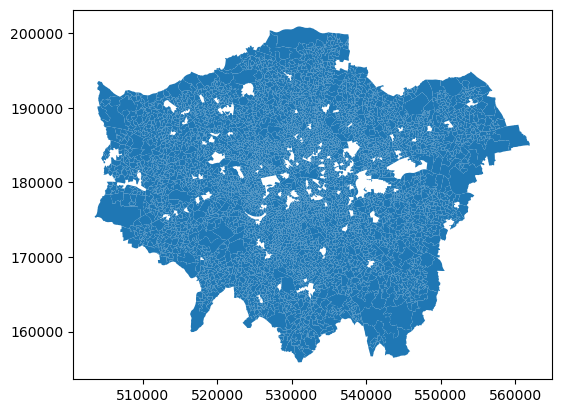

In [30]:
# This plot shows that there are some boundaries missing from the data

CrimeMap_2011.plot()

In [43]:
# Outer join to see how many boundaries are missing

CrimeMap_2011_outerjoin = lsoa_2011.merge(crime_2011, on = 'LSOA Code', how = 'outer')

In [45]:
# There are 335 boundaries missing from the geojson file (ignore the 30104 figure, this is because the geojson cover all England)

CrimeMap_2011_outerjoin.isnull().sum()

OBJECTID                    335
LSOA Code                     0
LSOA11NM                    335
BNG_E                       335
BNG_N                       335
LONG_                       335
LAT                         335
Shape_Leng                  335
GlobalID                    335
geometry                    335
2011 Crime/1000 people    30104
dtype: int64

In [48]:
# We seem to have crime rate for those LSOAs but we are just missing the boundaries

CrimeMap_2011_outerjoin[CrimeMap_2011_outerjoin[['LSOA11NM']].isnull().any(axis=1)]

,OBJECTID,LSOA Code,LSOA11NM,BNG_E,BNG_N,LONG_,LAT,Shape_Leng,GlobalID,geometry,2011 Crime/1000 people
34753,NaN,E01033784,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,192.889561
34754,NaN,E01033785,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,334.572491
34755,NaN,E01033786,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,185.328185
34756,NaN,E01033787,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,46.666667
34757,NaN,E01033788,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,62.709030
...,...,...,...,...,...,...,...,...,...,...,...
35083,NaN,E01035718,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,439.961575
35084,NaN,E01035719,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,103.103103
35085,NaN,E01035720,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,69.955157
35086,NaN,E01035721,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,287.187040


In [239]:
# Reading 2021 LSOA Boundaries

lsoa_2021 = geop.read_file('LSOA_Boundaries_2021.shp')

In [240]:
lsoa_2021.head(5)

,OA21CD,LSOA21CD,LSOA21NM,LSOA21NMW,BNG_E,BNG_N,LAT,LONG,GlobalID,geometry
0,E00000001,E01000001,City of London 001A,None,532250,181864,51.5202,-0.09523,09af0f57-ef7c-448b-b0ba-093649a86e70,"POLYGON ((532303.492 181814.110, 532301.242 18..."
1,E00000003,E01000001,City of London 001A,None,532171,181819,51.5198,-0.09638,be17a101-45e8-4e24-8f46-ecf5ae97ad13,"POLYGON ((532213.378 181846.192, 532213.954 18..."
2,E00000005,E01000001,City of London 001A,None,532166,181722,51.5190,-0.09649,cf9938e7-ce0a-4c09-9692-56d458696e28,"POLYGON ((532180.131 181763.020, 532177.000 18..."
3,E00000007,E01000001,City of London 001A,None,532088,181473,51.5167,-0.09771,297029c6-4f99-44c8-9392-ba6758ac99d5,"POLYGON ((532201.292 181668.180, 532205.000 18..."
4,E00000010,E01000003,City of London 001C,None,532092,182114,51.5225,-0.09741,eee105a5-6df7-41b7-ba8e-d77deb24493f,"POLYGON ((532127.958 182133.192, 532106.413 18..."


In [241]:
# Change of column name

lsoa_2021 = lsoa_2021.rename(columns={'LSOA21CD':'LSOA Code'})

In [242]:
# Selection of crime data for 2021 only

crime_2021 = crime_final.copy()
crime_2021 = crime_2021 [['LSOA Code', '2021 Crime/1000 people']]

In [244]:
# Merging the 2021 crime data with the 2021 LSOA Boundaries

CrimeMap_2021 = lsoa_2021.merge(crime_2021)

In [245]:
# View of Merged Data

CrimeMap_2021.head(5)

,OA21CD,LSOA Code,LSOA21NM,LSOA21NMW,BNG_E,BNG_N,LAT,LONG,GlobalID,geometry,2021 Crime/1000 people
0,E00000001,E01000001,City of London 001A,None,532250,181864,51.5202,-0.09523,09af0f57-ef7c-448b-b0ba-093649a86e70,"POLYGON ((532303.492 181814.110, 532301.242 18...",NaN
1,E00000003,E01000001,City of London 001A,None,532171,181819,51.5198,-0.09638,be17a101-45e8-4e24-8f46-ecf5ae97ad13,"POLYGON ((532213.378 181846.192, 532213.954 18...",NaN
2,E00000005,E01000001,City of London 001A,None,532166,181722,51.5190,-0.09649,cf9938e7-ce0a-4c09-9692-56d458696e28,"POLYGON ((532180.131 181763.020, 532177.000 18...",NaN
3,E00000007,E01000001,City of London 001A,None,532088,181473,51.5167,-0.09771,297029c6-4f99-44c8-9392-ba6758ac99d5,"POLYGON ((532201.292 181668.180, 532205.000 18...",NaN
4,E00166756,E01000001,City of London 001A,None,532084,181846,51.5201,-0.09762,e390d7bc-00cd-425f-b229-04b2505f8800,"POLYGON ((532104.872 182011.887, 532105.312 18...",NaN


<Axes: >

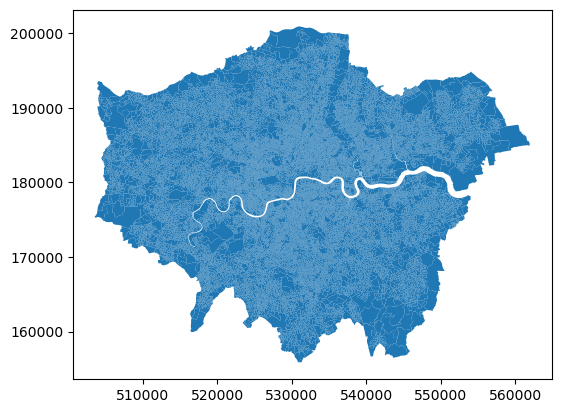

In [58]:
# This plot shows that we are not missing any boundaries for 2021

CrimeMap_2021.plot()

In [59]:
# There are only 34 LSOAs with missing crime rate. LSOA21NMW does not matter to us.

CrimeMap_2021.isnull().sum()

OA21CD                        0
LSOA Code                     0
LSOA21NM                      0
LSOA21NMW                 26369
BNG_E                         0
BNG_N                         0
LAT                           0
LONG                          0
GlobalID                      0
geometry                      0
2021 Crime/1000 people       34
dtype: int64

In [61]:
# Outer join to see if any boundaries are missing

CrimeMap_2021_outerjoin = lsoa_2021.merge(crime_2021, on = 'LSOA Code', how = 'outer')

In [62]:
# There are no boundaries missing. Ignore the values for LSOA21NMW and the 2021 Crime data. The shape files covers all England.

CrimeMap_2021_outerjoin.isnull().sum()

OA21CD                         0
LSOA Code                      0
LSOA21NM                       0
LSOA21NMW                 178605
BNG_E                          0
BNG_N                          0
LAT                            0
LONG                           0
GlobalID                       0
geometry                       0
2021 Crime/1000 people    162545
dtype: int64

Merge non UK population percentage with geometry column for each LSOA (2011 and 2021 years)

In [234]:
nonUKPopulation = crime_final.copy()

nonUKPopulation_2011=nonUKPopulation[['LSOA Code','2011 Non UK Percentage']]

nonUKPopulation_2011 = lsoa_2011.merge(nonUKPopulation_2011)  #nothing missing
print(nonUKPopulation_2011.head())


nonUKPopulation_2011.isnull().sum()
#nonUKPopulation_2011.shape  #4659, 11
#type(nonUKPopulation_2011) # geopandas.geodataframe.GeoDataFrame



# nonUKPopulation_2021=nonUKPopulation[['LSOA Code','2021 Non UK Percentage']]
# nonUKPopulation_2021.head()

#PopulationMap_2011 = lsoa_2011.merge(crime_2011[''])

   OBJECTID  LSOA Code                   LSOA11NM   BNG_E   BNG_N     LONG_  \
0         1  E01000034  Barking and Dagenham 003A  550689  186433  0.172296   
1         2  E01000035  Barking and Dagenham 010A  549957  185575  0.161380   
2         3  E01000036  Barking and Dagenham 010B  550645  185231  0.171148   
3         4  E01000037  Barking and Dagenham 003B  551195  187087  0.179870   
4         5  E01000038  Barking and Dagenham 003C  550700  187149  0.172761   

       LAT   Shape_Leng                              GlobalID  \
0  51.5567  6006.847623  2a20725d-7bab-4a96-b09b-154eb16073a5   
1  51.5491  3609.905134  47eef4c6-f44f-43c7-ba2f-bd8a4e62b5ee   
2  51.5459  4393.928508  57bf633a-6b2d-49f1-87fa-e64b1c2503b3   
3  51.5624  2905.634678  de173b53-0b6e-4886-a4b6-3b59153cfcf3   
4  51.5631  2305.558903  16d8a8a9-39a1-40b8-a459-41b2f1fd0d04   

                                            geometry  2011 Non UK Percentage  
0  POLYGON ((550783.502 186822.004, 550783.084 18...   

OBJECTID                  0
LSOA Code                 0
LSOA11NM                  0
BNG_E                     0
BNG_N                     0
LONG_                     0
LAT                       0
Shape_Leng                0
GlobalID                  0
geometry                  0
2011 Non UK Percentage    0
dtype: int64

In [247]:
nonUKPopulation_2021=nonUKPopulation[['LSOA Code','2021 Non UK Percentage']]

nonUKPopulation_2021 = lsoa_2011.merge(nonUKPopulation_2021)
nonUKPopulation_2021.head()

#nonUKPopulation_2021 = lsoa_2021.merge(nonUKPopulation_2011)  #nothing missing
print(nonUKPopulation_2021.head())


print(nonUKPopulation_2021.isnull().sum())

nonUKPopulation_2021_outerjoin = lsoa_2021.merge(nonUKPopulation_2021, on = 'LSOA Code', how = 'outer')

nonUKPopulation_2021.shape  #4659, 11

   OBJECTID  LSOA Code                   LSOA11NM   BNG_E   BNG_N     LONG_  \
0         1  E01000034  Barking and Dagenham 003A  550689  186433  0.172296   
1         2  E01000035  Barking and Dagenham 010A  549957  185575  0.161380   
2         3  E01000036  Barking and Dagenham 010B  550645  185231  0.171148   
3         4  E01000037  Barking and Dagenham 003B  551195  187087  0.179870   
4         5  E01000038  Barking and Dagenham 003C  550700  187149  0.172761   

       LAT   Shape_Leng                              GlobalID  \
0  51.5567  6006.847623  2a20725d-7bab-4a96-b09b-154eb16073a5   
1  51.5491  3609.905134  47eef4c6-f44f-43c7-ba2f-bd8a4e62b5ee   
2  51.5459  4393.928508  57bf633a-6b2d-49f1-87fa-e64b1c2503b3   
3  51.5624  2905.634678  de173b53-0b6e-4886-a4b6-3b59153cfcf3   
4  51.5631  2305.558903  16d8a8a9-39a1-40b8-a459-41b2f1fd0d04   

                                            geometry  2021 Non UK Percentage  
0  POLYGON ((550783.502 186822.004, 550783.084 18...   

(4659, 11)